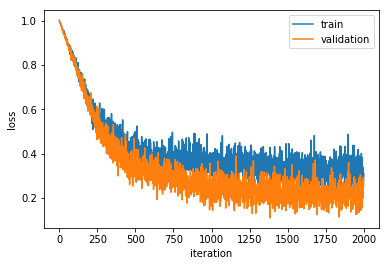

In [ ]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
train,target=load_svmlight_file('C:/Users/chen/Desktop/australian_scale.txt')#读取数据
x_train,x_validation, y_train,y_validation = train_test_split(train,
target,test_size = 0.2,random_state = 0)#切分数据集
def loss_fn(w, x, y, reg):#定义loss函数
    num_train = x.shape[0]
    num_classes = w.shape[1]
    scores = x.dot(w)
    correct_class_scores = scores[range(num_train), list(y)].reshape(-1, 1)
    margins = np.maximum(0, scores - correct_class_scores + 1)
    margins[range(num_train), list(y)] = 0
    loss = np.sum(margins) / num_train + 0.5 * reg * np.sum(w * w)
    coeff_mat = np.zeros((num_train, num_classes))
    coeff_mat[margins > 0] = 1
    coeff_mat[range(num_train), list(y)] = 0
    coeff_mat[range(num_train), list(y)] = - np.sum(coeff_mat, axis=1)
    dw = x.T.dot(coeff_mat)
    dw = dw / num_train + reg * w
    return loss, dw

class LinearClassifier:#定义线性分类模型
    def __init__(self):
        self.w = None
        self.le = LabelEncoder()
    def train(self, X, y, learning_rate=0.005, reg=1e-5, num_iters=2000, batch_size=200):
        num_train, dim = X.shape
        y = self.le.fit_transform(y)
        num_classes = int(np.max(y)) + 1
        if self.w is None:
            self.w = 0.001 * np.random.randn(dim, num_classes)
        loss_history = []
        for i in range(num_iters):
            batch_idx = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[batch_idx]
            y_batch = y[batch_idx]
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)
            self.w += -1 * learning_rate * grad
        return loss_history

class LinearSVM(LinearClassifier):#支持向量机
    def loss(self, X_batch, y_batch, reg):
        return loss_fn(self.w, X_batch, y_batch, reg)

clf = LinearSVM()
loss_train = clf.train(x_train, y_train)
loss_validation = LinearSVM().train(x_validation, y_validation)
pyplot.plot(loss_train, mfc='w', label='train')
pyplot.plot(loss_validation, mfc='w', label='validation')
pyplot.legend()
pyplot.xlabel("iteration")
pyplot.ylabel("loss")
pyplot.show()
